In [19]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
# from numpy.random import normal as normal
from scipy.stats import norm as norm


def generateDist(N, prob):
	dist = np.zeros(N + 1)
	for i in range(N + 1):
		dist[i] = binom.pmf(i, N, prob)
	print(dist)
	print(np.sum(dist))
	return dist

def dp(p, c, N, T, prob):
    V=np.zeros((N+1, T+1))
    Y=np.zeros((N+1, T+1))

    dist = generateDist(N, prob)

    for t in range(1,T+1):
        for q in range(N+1):
            cand=[]
            for yt in range(q, N+1):

                pi=0
                for x in range(yt+1):
                    pi+=x*dist[x]
                for x in range(yt+1, N+1):
                    pi+=yt*dist[x]
                pi=pi*p-(yt-q)*c

                e=0
                for x in range(yt+1):
                    e+=V[yt-x][t-1]*dist[x]
                for x in range(yt+1, N+1):
                    e+=V[0][t-1]*dist[x]
                cand.append((pi+e, yt))
            pick=max(cand)
            V[q][t]=pick[0]
            Y[q][t]=pick[1]
#     line chart
    for t in range(T+1):
        x=[i for i in range(N+1)]
        y=[V[i][t] for i in range(N+1)]
        plt.plot(x,y)
        print("------------------------period %d left-------------------------"%t)
        plt.show()  
    print(V)
    print(Y)


[2.82475249e-02 1.21060821e-01 2.33474440e-01 2.66827932e-01
 2.00120949e-01 1.02919345e-01 3.67569090e-02 9.00169200e-03
 1.44670050e-03 1.37781000e-04 5.90490000e-06]
1.0000000000000007
------------------------period 0-------------------------


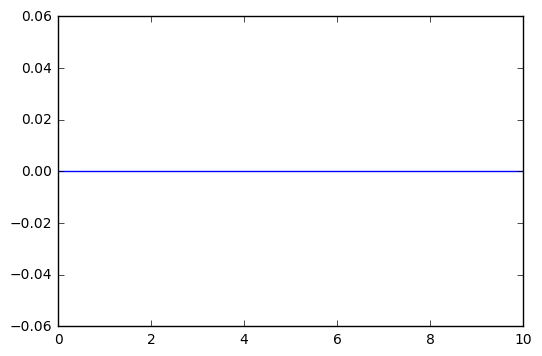

------------------------period 1-------------------------


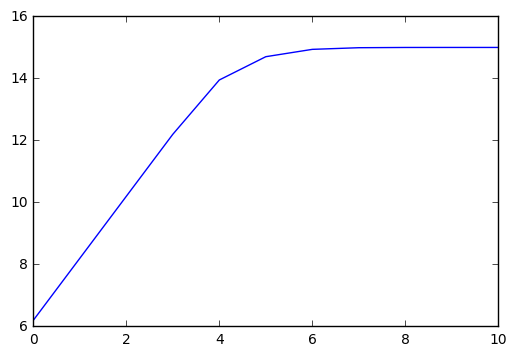

------------------------period 2-------------------------


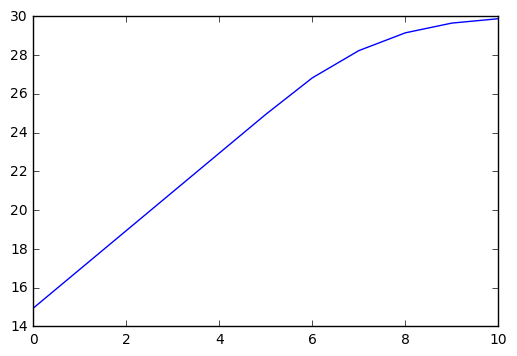

------------------------period 3-------------------------


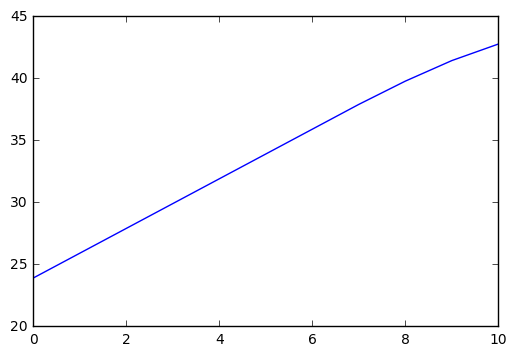

------------------------period 4-------------------------


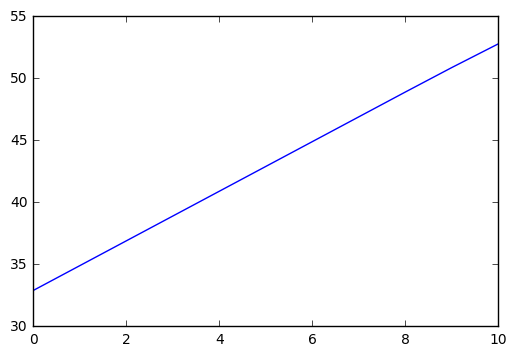

------------------------period 5-------------------------


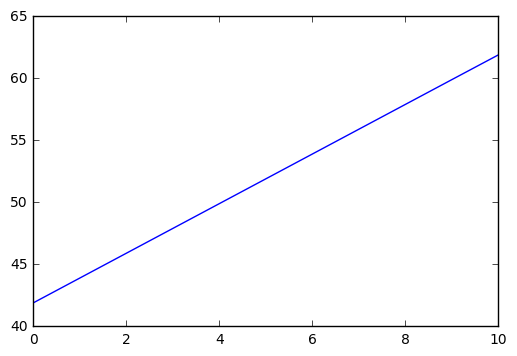

[[ 0.          6.19830671 14.94695561 23.90750036 32.90352003 41.90307126]
 [ 0.          8.19830671 16.94695561 25.90750036 34.90352003 43.90307126]
 [ 0.         10.19830671 18.94695561 27.90750036 36.90352003 45.90307126]
 [ 0.         12.19830671 20.94695561 29.90750036 38.90352003 47.90307126]
 [ 0.         13.95025312 22.94695561 31.90750036 40.90352003 49.90307126]
 [ 0.         14.70159479 24.94695561 33.90750036 42.90352003 51.90307126]
 [ 0.         14.93833972 26.8301172  35.90750036 44.90352003 53.90307126]
 [ 0.         14.99130011 28.23571585 37.90750036 46.90352003 55.90307126]
 [ 0.         14.99925205 29.15401373 39.78247861 48.90352003 57.90307126]
 [ 0.         14.99997048 29.65632917 41.43969877 50.87913317 59.90281345]
 [ 0.         15.         29.88270808 42.77377066 52.78965347 61.89735129]]
[[ 0.  3.  5.  7.  8.  8.]
 [ 0.  3.  5.  7.  8.  8.]
 [ 0.  3.  5.  7.  8.  8.]
 [ 0.  3.  5.  7.  8.  8.]
 [ 0.  4.  5.  7.  8.  8.]
 [ 0.  5.  5.  7.  8.  8.]
 [ 0.  6.  6

In [20]:
dp(5, 2, 10, 5, 0.3)
